# Data analytics project: Exploration of Zurich's hotels and tourist attractions

Team: Diego Gonzalez, Adalía Aneiros, Stanislaw Zapala

## Import libraries


In [ ]:
# Install required libraries
pip install msticpy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import msticpy as mp
import os
import re
import numpy as np
import networkx as nx
import math
import folium
import scipy.stats as stats
import statsmodels.api as sm
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.metrics import RocCurveDisplay
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# Hotel data

## Data preparation


In [ ]:
# Import hotels data
df_hotels = pd.read_csv("ZurichHotels.csv")
df_hotels.head()

,web-scraper-order,web-scraper-start-url,name,address,description,review_cat,price,no_reviews
0,1732027449-1,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Zurich Youth Hostel,"Mutschellenstrasse 114A, Zurich, Switzerland","Offering 421 rooms, the 2-star Zurich Youth Hostel boasts a location within 5 minutes' walk of L...",Excellent,61 CHF,(4093 reviews)
1,1732027449-2,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Saint Georges Hotel,"Weberstrasse 11, Zurich, Switzerland","Located 15 km from Kloten airport, the 2-star Saint Georges Hotel Zurich features airport transf...",Excellent,114 CHF,(1894 reviews)
2,1732027449-3,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Ibis Zuerich City West,"Schiffbaustrasse 11, Zurich, Switzerland","A 10-minute drive from Old Town, the 3-star Ibis Zurich City West hotel offers a lift, a snack a...",Good,143 CHF,(2135 reviews)
3,1732027449-4,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Hotel Seehof,"Seehofstrasse 11, Zurich, Switzerland","Featuring a currency exchange and a lift, the 3-star Hotel Seehof Zurich is located about 5 minu...",Good,213 CHF,(949 reviews)
4,1732027449-5,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Inside Five,"Motorenstrasse 11, Zurich, Switzerland","Located about a 5-minute walk from Markthalle, the comfortable 3-star Inside Five Aparthotel Zur...",Good,112 CHF,(1977 reviews)


In [ ]:
# Types of variables
print(df_hotels.dtypes)

web-scraper-order        object
web-scraper-start-url    object
name                     object
address                  object
description              object
review_cat               object
price                    object
no_reviews               object
dtype: object


In [ ]:
# Change 'price' to numeric by first removing the 'CHF' currency symbol and then converting it from a string to a numeric data type
df_hotels['price'] = df_hotels['price'].str.replace('CHF', '')
df_hotels['price'] = pd.to_numeric(df_hotels['price'])
df_hotels.head()

,web-scraper-order,web-scraper-start-url,name,address,description,review_cat,price,no_reviews
0,1732027449-1,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Zurich Youth Hostel,"Mutschellenstrasse 114A, Zurich, Switzerland","Offering 421 rooms, the 2-star Zurich Youth Hostel boasts a location within 5 minutes' walk of L...",Excellent,61,(4093 reviews)
1,1732027449-2,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Saint Georges Hotel,"Weberstrasse 11, Zurich, Switzerland","Located 15 km from Kloten airport, the 2-star Saint Georges Hotel Zurich features airport transf...",Excellent,114,(1894 reviews)
2,1732027449-3,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Ibis Zuerich City West,"Schiffbaustrasse 11, Zurich, Switzerland","A 10-minute drive from Old Town, the 3-star Ibis Zurich City West hotel offers a lift, a snack a...",Good,143,(2135 reviews)
3,1732027449-4,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Hotel Seehof,"Seehofstrasse 11, Zurich, Switzerland","Featuring a currency exchange and a lift, the 3-star Hotel Seehof Zurich is located about 5 minu...",Good,213,(949 reviews)
4,1732027449-5,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Inside Five,"Motorenstrasse 11, Zurich, Switzerland","Located about a 5-minute walk from Markthalle, the comfortable 3-star Inside Five Aparthotel Zur...",Good,112,(1977 reviews)


In [ ]:
# Change 'no_reviews' to numeric first by identifying unwanted characters and words using regular expressions and 
# then changing it from a string to a numeric data type

df_hotels['no_reviews'] = df_hotels['no_reviews'].str.replace(r'\(|\)|reviews|review', '', regex=True)
df_hotels['no_reviews'] = pd.to_numeric(df_hotels['no_reviews'])
df_hotels.head()

,web-scraper-order,web-scraper-start-url,name,address,description,review_cat,price,no_reviews
0,1732027449-1,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Zurich Youth Hostel,"Mutschellenstrasse 114A, Zurich, Switzerland","Offering 421 rooms, the 2-star Zurich Youth Hostel boasts a location within 5 minutes' walk of L...",Excellent,61,4093
1,1732027449-2,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Saint Georges Hotel,"Weberstrasse 11, Zurich, Switzerland","Located 15 km from Kloten airport, the 2-star Saint Georges Hotel Zurich features airport transf...",Excellent,114,1894
2,1732027449-3,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Ibis Zuerich City West,"Schiffbaustrasse 11, Zurich, Switzerland","A 10-minute drive from Old Town, the 3-star Ibis Zurich City West hotel offers a lift, a snack a...",Good,143,2135
3,1732027449-4,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Hotel Seehof,"Seehofstrasse 11, Zurich, Switzerland","Featuring a currency exchange and a lift, the 3-star Hotel Seehof Zurich is located about 5 minu...",Good,213,949
4,1732027449-5,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Inside Five,"Motorenstrasse 11, Zurich, Switzerland","Located about a 5-minute walk from Markthalle, the comfortable 3-star Inside Five Aparthotel Zur...",Good,112,1977


In [ ]:
# Categories in 'review_cat' variable
df_hotels['review_cat'] = pd.Categorical(df_hotels['review_cat'])
df_hotels['review_cat'].values.unique()

['Excellent', 'Good', 'Average', 'Acceptable', NaN]
Categories (4, object): ['Acceptable', 'Average', 'Excellent', 'Good']

In [ ]:
# Encoding of categorical variable using a dictionary
dicc_review = {'Acceptable' : 1, 'Average' : 2, 'Good' : 3, 'Excellent' : 4}
df_hotels['review_cat'] = df_hotels['review_cat'].map(dicc_review)
df_hotels.head()

,web-scraper-order,web-scraper-start-url,name,address,description,review_cat,price,no_reviews
0,1732027449-1,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Zurich Youth Hostel,"Mutschellenstrasse 114A, Zurich, Switzerland","Offering 421 rooms, the 2-star Zurich Youth Hostel boasts a location within 5 minutes' walk of L...",4,61,4093
1,1732027449-2,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Saint Georges Hotel,"Weberstrasse 11, Zurich, Switzerland","Located 15 km from Kloten airport, the 2-star Saint Georges Hotel Zurich features airport transf...",4,114,1894
2,1732027449-3,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Ibis Zuerich City West,"Schiffbaustrasse 11, Zurich, Switzerland","A 10-minute drive from Old Town, the 3-star Ibis Zurich City West hotel offers a lift, a snack a...",3,143,2135
3,1732027449-4,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Hotel Seehof,"Seehofstrasse 11, Zurich, Switzerland","Featuring a currency exchange and a lift, the 3-star Hotel Seehof Zurich is located about 5 minu...",3,213,949
4,1732027449-5,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Inside Five,"Motorenstrasse 11, Zurich, Switzerland","Located about a 5-minute walk from Markthalle, the comfortable 3-star Inside Five Aparthotel Zur...",3,112,1977


In [ ]:
# Type of variables
df_hotels.dtypes

,0
web-scraper-order,object
web-scraper-start-url,object
name,object
address,object
description,object
review_cat,category
price,int64
no_reviews,int64


In [ ]:
# number of entries per column
df_hotels.count()

,0
web-scraper-order,155
web-scraper-start-url,155
name,155
address,155
description,155
review_cat,153
price,155
no_reviews,155


In [ ]:
# Count of missing values
df_hotels.isnull().sum()

,0
web-scraper-order,0
web-scraper-start-url,0
name,0
address,0
description,0
review_cat,2
price,0
no_reviews,0


In [ ]:
# Remove missing values
df_hotels = df_hotels.dropna()
df_hotels.isnull().sum()

,0
web-scraper-order,0
web-scraper-start-url,0
name,0
address,0
description,0
review_cat,0
price,0
no_reviews,0


In [ ]:
# Count of duplicates
df_hotels.duplicated().sum()

0

## Creation of new variables


### Geocoding (using GEOPY)


In [ ]:

# Initialize the geolocator object using the Nominatim geocoding service
geolocator = Nominatim(user_agent="exercise", timeout=10)

# Function to get coordinates based on location
def get_coordinates(location):
    try:
        geo = geolocator.geocode(location)
        if geo:
            return geo.latitude, geo.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return None, None

In [ ]:
# Apply the function to our data using a lambda function
df_hotels[['Latitude', 'Longitude']] = df_hotels['address'].apply(lambda loc: pd.Series(get_coordinates(loc)))
df_hotels.head()

,web-scraper-order,web-scraper-start-url,name,address,description,review_cat,price,no_reviews,Latitude,Longitude
0,1732027449-1,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Zurich Youth Hostel,"Mutschellenstrasse 114A, Zurich, Switzerland","Offering 421 rooms, the 2-star Zurich Youth Hostel boasts a location within 5 minutes' walk of L...",4,61,4093,47.350288,8.527833
1,1732027449-2,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Saint Georges Hotel,"Weberstrasse 11, Zurich, Switzerland","Located 15 km from Kloten airport, the 2-star Saint Georges Hotel Zurich features airport transf...",4,114,1894,47.370729,8.528126
2,1732027449-3,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Ibis Zuerich City West,"Schiffbaustrasse 11, Zurich, Switzerland","A 10-minute drive from Old Town, the 3-star Ibis Zurich City West hotel offers a lift, a snack a...",3,143,2135,47.389056,8.517157
3,1732027449-4,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Hotel Seehof,"Seehofstrasse 11, Zurich, Switzerland","Featuring a currency exchange and a lift, the 3-star Hotel Seehof Zurich is located about 5 minu...",3,213,949,47.364360,8.547783
4,1732027449-5,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Inside Five,"Motorenstrasse 11, Zurich, Switzerland","Located about a 5-minute walk from Markthalle, the comfortable 3-star Inside Five Aparthotel Zur...",3,112,1977,47.384977,8.529051


In [ ]:
# Drop missing values
df_hotels = df_hotels.dropna()
df_hotels.isna().sum()

,0
web-scraper-order,0
web-scraper-start-url,0
name,0
address,0
description,0
review_cat,0
price,0
no_reviews,0
Latitude,0
Longitude,0


In [ ]:
# Visualization of hotel locations using an interactive Folium map
# https://msticpy.readthedocs.io/en/latest/visualization/FoliumMap.html

mp.init_notebook()
df_hotels.mp_plot.folium_map(
    lat_column="Latitude", long_column="Longitude", zoom_start=10
)

In [ ]:
# Visualization of locations with layers based on review categories
df_hotels.mp_plot.folium_map(
    lat_column="Latitude", long_column="Longitude", layer_column = "review_cat", zoom_start=10
)

/usr/local/lib/python3.10/dist-packages/msticpy/vis/foliummap.py:790: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for index, (layer, layer_df) in enumerate(data.groupby(layer_column)):


## Non-graphical exploratory data analysis

In [ ]:
# General information about the dataset (number of non-null values and data type for each column)
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 154
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   web-scraper-order      152 non-null    object  
 1   web-scraper-start-url  152 non-null    object  
 2   name                   152 non-null    object  
 3   address                152 non-null    object  
 4   description            152 non-null    object  
 5   review_cat             152 non-null    category
 6   price                  152 non-null    int64   
 7   no_reviews             152 non-null    int64   
 8   Latitude               152 non-null    float64 
 9   Longitude              152 non-null    float64 
dtypes: category(1), float64(2), int64(2), object(5)
memory usage: 12.2+ KB


In [ ]:
# Summary statistics of numerical variables
df_hotels[['price', 'no_reviews']].describe()

,price,no_reviews
count,152.000000,152.000000
mean,231.355263,1827.802632
std,145.510766,1829.342664
min,35.000000,1.000000
25%,139.750000,367.250000
50%,203.500000,1334.500000
75%,268.000000,2626.500000
max,1022.000000,9769.000000


In [ ]:
# Distribution of values in categorical variable by counting the occurrences of each unique one
df_hotels['review_cat'].value_counts()

,count
review_cat,
4,85
3,57
2,9
1,1


In [ ]:
# Correlation matrix between numerical values
corr_matrix = df_hotels[['price', 'no_reviews', 'review_cat']].corr()
corr_matrix.columns = ['Price', 'Number of reviews', 'Review category']
corr_matrix.index = ['Price', 'Number of reviews', 'Review category']
corr_matrix

,Price,Number of reviews,Review category
Price,1.000000,-0.372821,0.139150
Number of reviews,-0.372821,1.000000,0.017792
Review category,0.139150,0.017792,1.000000


## Graphical exploratory data analysis

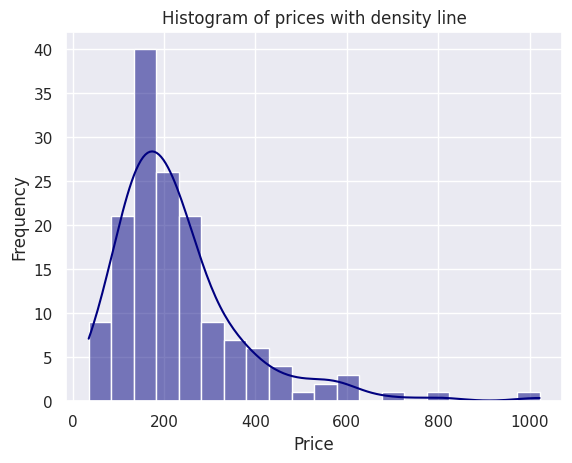

In [ ]:
# Histogram of the 'price' varibale with a density curve to highlight their frequency and distribution
sns.histplot(df_hotels['price'], bins=20, color="navy", kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of prices with density line')
plt.show()

<ipython-input-121-08a53897f8dc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_hotels['price'], palette = "Blues")


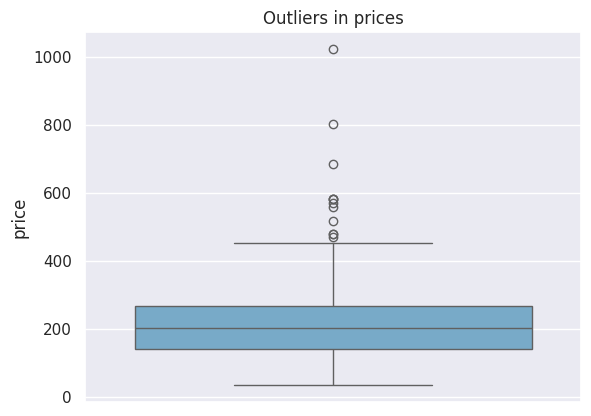

In [ ]:
# Prices boxplot (to identify outliers)
sns.boxplot(df_hotels['price'], palette = "Blues")
plt.title('Outliers in prices')
plt.show()

<ipython-input-122-6bebe75b245a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_cat', data=df_hotels, palette='Blues')


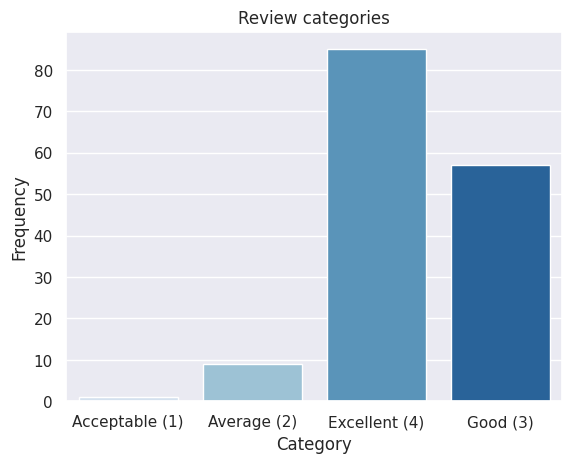

In [ ]:
# Bar plot to visualize the count of each category in the 'review_cat'
sns.countplot(x='review_cat', data=df_hotels, palette='Blues')
plt.title('Review categories')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Acceptable (1)', 'Average (2)', 'Excellent (4)', 'Good (3)'])
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

<ipython-input-123-31ff6158d516>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_cat', y='price', data=df_hotels, palette='Blues')


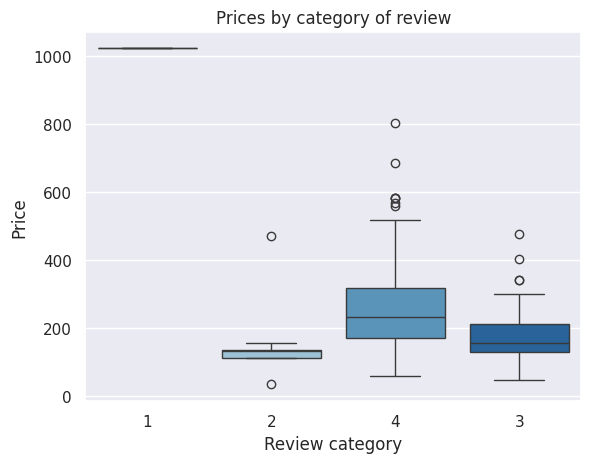

In [ ]:
# Boxplot to visualize the distribution of 'price' across different categories
sns.boxplot(x='review_cat', y='price', data=df_hotels, palette='Blues')
plt.title('Prices by category of review')
plt.xlabel('Review category')
plt.ylabel('Price')
plt.show()


<ipython-input-124-ed140bc05136>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_hotels['no_reviews'], bins=30, kde=True, palette="Blues")


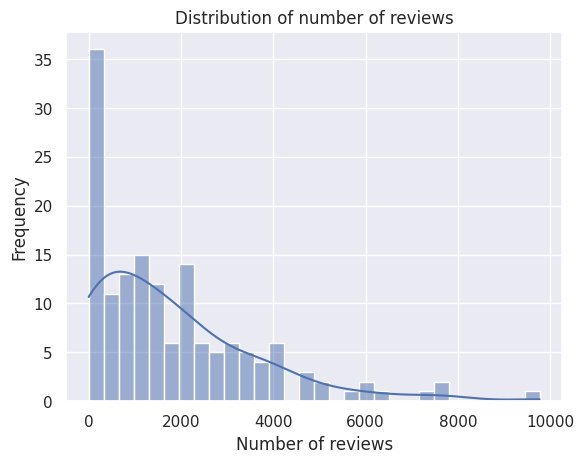

In [ ]:
# Distribution of number of reviews
sns.histplot(df_hotels['no_reviews'], bins=30, kde=True, palette="Blues")
plt.title('Distribution of number of reviews')
plt.xlabel('Number of reviews')
plt.ylabel('Frequency')
plt.show()

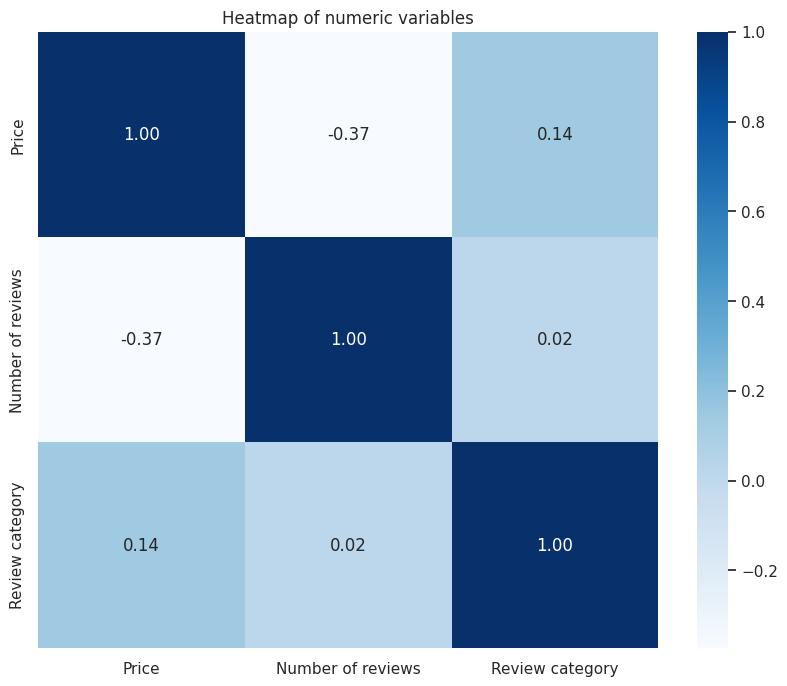

In [ ]:
# Correlation heatmap of numeric variables
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap = "Blues")
plt.title('Heatmap of numeric variables')
plt.show()

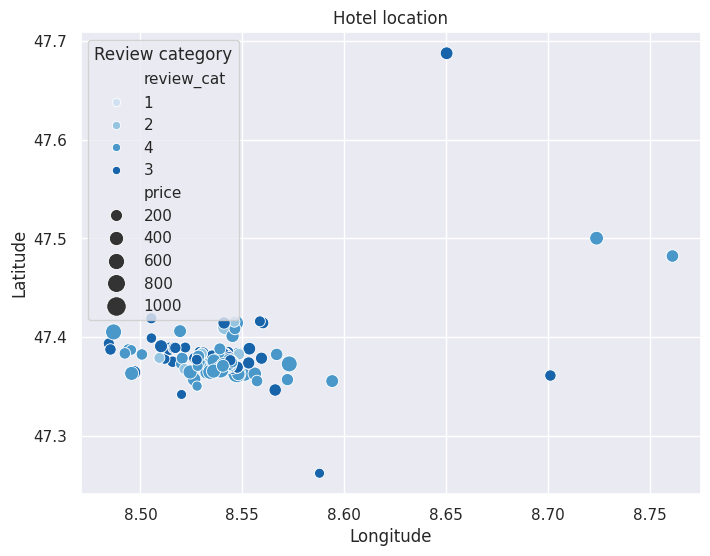

In [ ]:
# Scatter plot of Hotels location based on coordinates
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=df_hotels, hue='review_cat', palette='Blues', size='price', sizes=(50, 200))
plt.title('Hotel location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Review category')
plt.show()

## Modeling method

### ANOVA


In [ ]:
# One-way Anova to determine if there are statistically significant differences in the average price across the four review categories.

# Create subsets (groups)
c1 = df_hotels.loc[df_hotels['review_cat'] == 1]
c2 = df_hotels.loc[df_hotels['review_cat'] == 2]
c3 = df_hotels.loc[df_hotels['review_cat'] == 3]
c4 = df_hotels.loc[df_hotels['review_cat'] == 4]

# Create ANOVA
fvalue, pvalue = stats.f_oneway(c1['price'],
                                c2['price'],
                                c3['price'],
                                c4['price'])

print('F-value:', fvalue.round(3), 'p-value', pvalue.round(4))

F-value: 20.223 p-value 0.0


Hypothesis:

$H_0$: There is no significant difference in the average prices between the four review categories.

$H_1$: At least one review category has a significantly different average price compared to the others.

Since the $p$-value is less than $\alpha$ (0.05), there is enough evidence to reject the null hypothesis, which suggests a difference in prices between the groups.

### Decision tree classifier


In [ ]:
# Decision tree classifier the review category of hotels based on the two features (number of reviews and price)

# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df_hotels[['no_reviews', 'price']],
                                                    df_hotels['review_cat'],
                                                    test_size=0.20,
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
    no_reviews  price
30         911    158
23         553    225
54        2624    196
78          19    403
11        4615    147 

y_train:
30    2
23    4
54    3
78    3
11    3
Name: review_cat, dtype: category
Categories (4, int64): [1, 2, 4, 3]


In [ ]:
# Initialize the classification tree model
clf = DecisionTreeClassifier(random_state=20,
                             max_depth=4)

# Train the classification tree model
clf = clf.fit(X_train, y_train)

# Make model predictions
y_pred = clf.predict(X_test)
y_pred

array([3, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 4, 4, 4, 4, 3,
       4, 3, 4, 3, 4, 4, 4, 4, 4])

In [ ]:
# Text representation of the classification tree
text_rep = tree.export_text(clf,
                            feature_names=list(X_train.columns))

# Print text_representation
print(text_rep)

|--- price <= 220.50
|   |--- price <= 151.50
|   |   |--- no_reviews <= 2097.50
|   |   |   |--- no_reviews <= 1643.00
|   |   |   |   |--- class: 3
|   |   |   |--- no_reviews >  1643.00
|   |   |   |   |--- class: 4
|   |   |--- no_reviews >  2097.50
|   |   |   |--- no_reviews <= 3997.50
|   |   |   |   |--- class: 3
|   |   |   |--- no_reviews >  3997.50
|   |   |   |   |--- class: 3
|   |--- price >  151.50
|   |   |--- price <= 208.50
|   |   |   |--- no_reviews <= 542.00
|   |   |   |   |--- class: 4
|   |   |   |--- no_reviews >  542.00
|   |   |   |   |--- class: 4
|   |   |--- price >  208.50
|   |   |   |--- no_reviews <= 507.50
|   |   |   |   |--- class: 3
|   |   |   |--- no_reviews >  507.50
|   |   |   |   |--- class: 3
|--- price >  220.50
|   |--- price <= 912.00
|   |   |--- price <= 478.50
|   |   |   |--- price <= 461.00
|   |   |   |   |--- class: 4
|   |   |   |--- price >  461.00
|   |   |   |   |--- class: 2
|   |   |--- price >  478.50
|   |   |   |--- class:

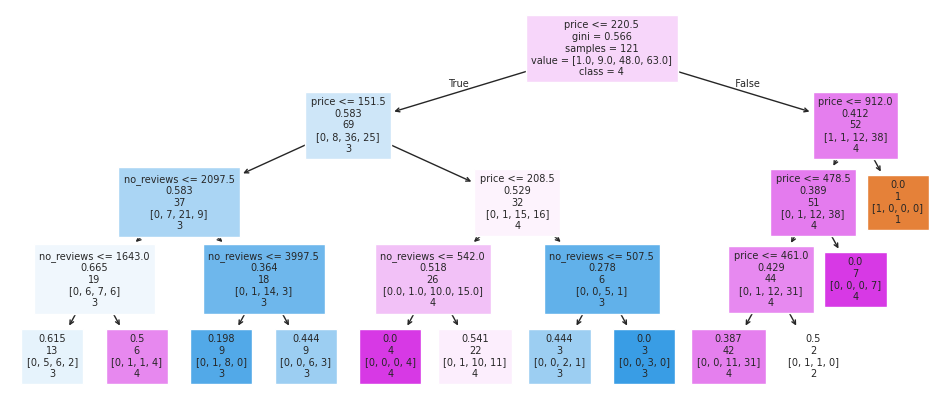

In [ ]:
# Plot the decision tree
fig = plt.figure(figsize=(12,5))
tree_plot = tree.plot_tree(clf,
                   feature_names=list(X_train.columns),
                   class_names=['1', '2', '3', '4'],
                   filled=True,
                   fontsize=7,
                   label='root')

In [ ]:
# Confusion matrix to know how well the model’s predictions match the actual labels.
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred), '\n')

Confusion matrix
[[ 7  2]
 [ 4 18]] 



In [ ]:
# Classification report (metrics)
print('Classification report')
print(classification_report(y_test, y_pred))

Classification report
              precision    recall  f1-score   support

           3       0.64      0.78      0.70         9
           4       0.90      0.82      0.86        22

    accuracy                           0.81        31
   macro avg       0.77      0.80      0.78        31
weighted avg       0.82      0.81      0.81        31



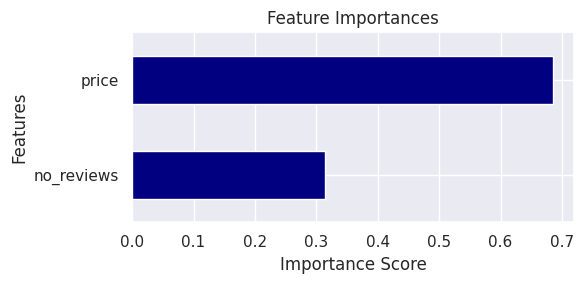

In [ ]:
# Show feature importance

cols = X_train.columns

# Derive feature importance from decision tree
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Barplot with feature importance
df_fi = pd.DataFrame({'features': cols, 'importances': importances})
df_fi.sort_values('importances', inplace=True)

# Plot feature importance
df_fi.plot(kind='barh',
           y='importances',
           x='features',
           color='navy',
           figsize=(6, 3),
           legend=False)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

### K-means clustering

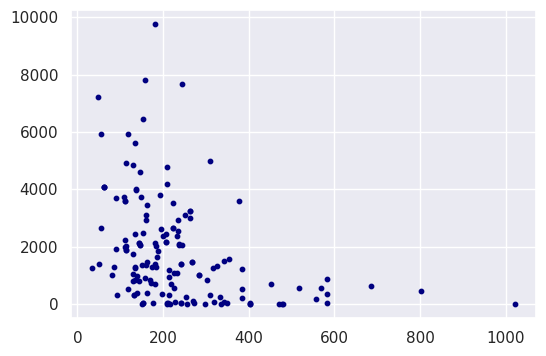

In [ ]:
# K-means to partition a dataset into distinct clusters based on similarities between the data points

# Scaling the data
X = df_hotels[['price', 'no_reviews']]

# Plot the data
plt.figure(figsize=(6,4))
plt.scatter(df_hotels['price'], df_hotels['no_reviews'], s=10, color='navy')
plt.show()

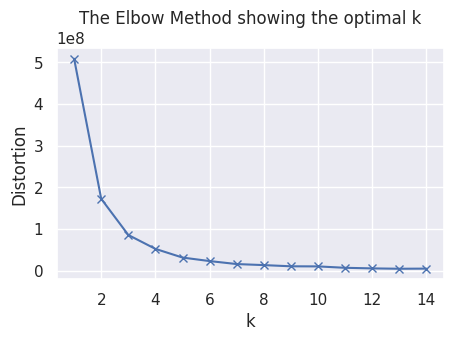

In [ ]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(1,15,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.show()

In [ ]:
# Number of clusters
k = 4

# Perform k-means clustering
kmeans_apmts = KMeans(n_clusters=k, random_state=42).fit(X)

# Add the clusters to data frame
X['cluster'] = kmeans_apmts.predict(X)

# Show number of apartments per cluster
X['cluster'].value_counts().sort_values(ascending=False)

<ipython-input-137-589541f1c853>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans_apmts.predict(X)


,count
cluster,
0,66
2,51
1,27
3,8


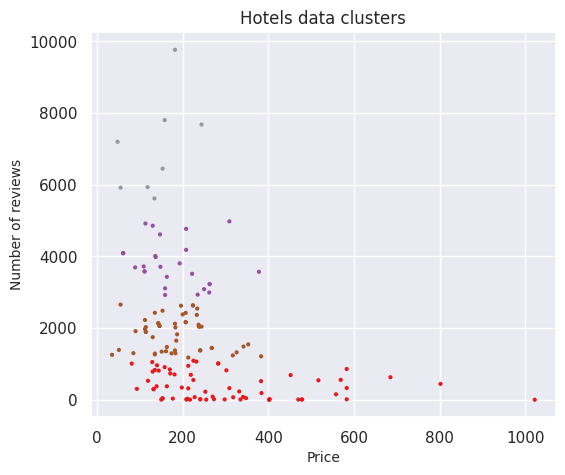

In [ ]:
# Plot kmeans clusters
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.scatter(df_hotels['price'], df_hotels['no_reviews'], c=kmeans_apmts.labels_, s=6, cmap = "Set1")

# Set title and axes labels
ax.set_title('Hotels data clusters', fontsize=12)
ax.set_xlabel('Price', fontsize=10)
ax.set_ylabel('Number of reviews', fontsize=10)

plt.show()

In [ ]:
# Calculate the Silhouette Score
print(f'Silhouette Score: {silhouette_score(X, kmeans_apmts.labels_):.4f}')

Silhouette Score: 0.5726


# Attractions data

## Data preparation


In [ ]:
# Import attractions data
df_att = pd.read_csv('data_attractions.csv')
df_att.head(5)

,@context,@type,@customType,identifier,copyrightHolder,license,tomasBookingId,category,name,disambiguatingDescription,description,titleTeaser,textTeaser,detailedInformation,zurichCardDescription,zurichCard,osm_id,image,price,photo,dateModified,opens,openingHours,openingHoursSpecification,specialOpeningHoursSpecification,address,geoCoordinates,place
0,https://schema.org/,LocalBusiness,NaN,1011454,"{'de': 'Zürich Tourismus www.zuerich.com', 'en': 'Zurich Tourism www.zuerich.com', 'it': 'Zürich...",CC BY-SA,NaN,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'N...","{'de': 'Jungfraujoch mit der Zürich Card', 'en': 'Jungfraujoch with the Zürich Card', 'fr': 'Jun...",{'de': 'Mit der Zürich Card erhalten Gäste 15% auf das einmalige Bergabenteuer Jungfraujoch – To...,"{'de': '<p>Wer clever plant, spart beim Tagesausflug auf das einzigartige Jungfraujoch 15%! Alle...","{'de': 'Jungfraujoch mit Zürich Card', 'en': 'Jungfraujoch with the Zürich Card', 'fr': 'Jungfra...",{'de': '15% günstiger aufs Jungfraujoch – diese einmalige Preisreduktion gibt’s mit der Zürich C...,"{'de': ['Günstiger aufs Jungfraujoch', 'Tagesausflug in die Schweizer Bergwelt', ""3'454 Meter üb...","{'de': '15% Ermässigung mit der Zürich Card', 'en': '15% discount with the Zürich Card', 'fr': '...",True,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_jungfraujoch_50412.j...,"{'de': None, 'en': None, 'fr': None, 'it': None}",[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_tour_jungfraujoch_1...,2024-10-14T15:56,[],"['Su,Mo,Tu,We,Th,Fr,Sa 08:00:00-16:50:00']",NaN,"{'de': None, 'en': None, 'fr': None, 'it': None}","{'addressCountry': 'CH', 'addressLocality': 'Grindelwald', 'postalCode': '3818', 'streetAddress'...","{'latitude': 46.547539504451, 'longitude': 7.9851704701986}",[]
1,https://schema.org/,LocalBusiness,NaN,1011189,"{'de': 'Zürich Tourismus www.zuerich.com', 'en': 'Zurich Tourism www.zuerich.com', 'it': 'Zürich...",CC BY-SA,NaN,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}","{'de': 'Urban Art am Flughafen Zürich', 'en': 'Urban Art at Zurich Airport', 'fr': 'Art urbain à...","{'de': 'Drei Kunstwerke, drei Stile von drei Schweizer Künstler:innen: im Durchgang zwischen dem...",{'de': '<h3>Onur Dinc<p>Der in Berlin lebende Solothurner K&uuml;nstler schafft fotorealistische...,"{'de': 'Urban Art am Flughafen Zürich', 'en': 'Urban Art at Zurich Airport', 'fr': 'Art urbain à...",{'de': 'Ein idealer Ort für Urban Art. Passend einerseits zum Mikrokosmos Flughafen und anderers...,"{'de': ['Street-Art Kunstwerke', 'Flughafen Zürich', 'Drei Künstler:innen'], 'en': ['Street Art ...",NaN,False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_z...,"{'de': None, 'en': None, 'fr': None, 'it': None}",[{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_...,2024-10-14T15:56,NaN,NaN,NaN,"{'de': 'Rund um die Uhr geöffnet', 'en': 'Open around the clock', 'it': 'Aperti tutto il giorno'...","{'addressCountry': 'CH', 'addressLocality': 'Zürich-Flughafen', 'postalCode': '8058', 'streetAdd...","{'latitude': 47.450098, 'longitude': 8.561898}",[]
2,https://schema.org/,SportsActivityLocation,NaN,1010518,"{'de': 'Zürich Tourismus www.zuerich.com', 'en': 'Zurich Tourism www.zuerich.com', 'it': 'Zürich...",CC BY-SA,NaN,"{'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'Sport': {'swissId': 'sui_01...","{'de': 'Orelliweg', 'en': 'Orelliweg', 'fr': 'Orelliweg', 'it': 'Orelliweg'}","{'de': 'Wer diesen Weg zwischen dem «Rigiblick» und dem Zoo Zürich unter die Füsse nimmt, hat im...",{'de': '<p>Mit der Seilbahn Rigiblick geht es in wenigen Minuten hoch zum gleichnamigen <a href=...,"{'de': 'Orelliweg', 'en': 'Orelliweg', 'fr': 'Orelliweg', 'it': 'Orelliweg'}",{'de': 'Bei Einheimischen sehr beliebt: Der Orelliweg eröffnet wunderbare Aus

In [ ]:
# Dimentions of the dataframe (shape)
print(f'Dimentions: {df_att.shape}')

Dimentions: (109, 28)


In [ ]:
# Count of missing values
df_att.isna().sum()

,0
@context,0
@type,0
@customType,64
identifier,0
copyrightHolder,0
license,0
tomasBookingId,108
category,0
name,0
disambiguatingDescription,0


In [ ]:
# Identification and dropping of columns that have a high proportion of missing values (more than 30% NA)
columns = df_att.keys()
na_count = df_att.isna().sum().tolist()
len_df = df_att.shape[0]
na_count = [val/len_df for val in na_count]
print('Columns to drop due to excess NA values: \n')
drop = ['@context']

for i, val in enumerate(na_count):
  if val > 0.3:
    drop.append(columns[i])
    print(columns[i])

df_att.drop(columns= drop, inplace= True)
df_att.head(5)

Columns to drop due to excess NA values: 

@customType
tomasBookingId
zurichCardDescription
opens
openingHours
openingHoursSpecification


,@type,identifier,copyrightHolder,license,category,name,disambiguatingDescription,description,titleTeaser,textTeaser,detailedInformation,zurichCard,osm_id,image,price,photo,dateModified,specialOpeningHoursSpecification,address,geoCoordinates,place
0,LocalBusiness,1011454,"{'de': 'Zürich Tourismus www.zuerich.com', 'en': 'Zurich Tourism www.zuerich.com', 'it': 'Zürich...",CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'N...","{'de': 'Jungfraujoch mit der Zürich Card', 'en': 'Jungfraujoch with the Zürich Card', 'fr': 'Jun...",{'de': 'Mit der Zürich Card erhalten Gäste 15% auf das einmalige Bergabenteuer Jungfraujoch – To...,"{'de': '<p>Wer clever plant, spart beim Tagesausflug auf das einzigartige Jungfraujoch 15%! Alle...","{'de': 'Jungfraujoch mit Zürich Card', 'en': 'Jungfraujoch with the Zürich Card', 'fr': 'Jungfra...",{'de': '15% günstiger aufs Jungfraujoch – diese einmalige Preisreduktion gibt’s mit der Zürich C...,"{'de': ['Günstiger aufs Jungfraujoch', 'Tagesausflug in die Schweizer Bergwelt', ""3'454 Meter üb...",True,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_jungfraujoch_50412.j...,"{'de': None, 'en': None, 'fr': None, 'it': None}",[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_tour_jungfraujoch_1...,2024-10-14T15:56,"{'de': None, 'en': None, 'fr': None, 'it': None}","{'addressCountry': 'CH', 'addressLocality': 'Grindelwald', 'postalCode': '3818', 'streetAddress'...","{'latitude': 46.547539504451, 'longitude': 7.9851704701986}",[]
1,LocalBusiness,1011189,"{'de': 'Zürich Tourismus www.zuerich.com', 'en': 'Zurich Tourism www.zuerich.com', 'it': 'Zürich...",CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}","{'de': 'Urban Art am Flughafen Zürich', 'en': 'Urban Art at Zurich Airport', 'fr': 'Art urbain à...","{'de': 'Drei Kunstwerke, drei Stile von drei Schweizer Künstler:innen: im Durchgang zwischen dem...",{'de': '<h3>Onur Dinc<p>Der in Berlin lebende Solothurner K&uuml;nstler schafft fotorealistische...,"{'de': 'Urban Art am Flughafen Zürich', 'en': 'Urban Art at Zurich Airport', 'fr': 'Art urbain à...",{'de': 'Ein idealer Ort für Urban Art. Passend einerseits zum Mikrokosmos Flughafen und anderers...,"{'de': ['Street-Art Kunstwerke', 'Flughafen Zürich', 'Drei Künstler:innen'], 'en': ['Street Art ...",False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_z...,"{'de': None, 'en': None, 'fr': None, 'it': None}",[{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_...,2024-10-14T15:56,"{'de': 'Rund um die Uhr geöffnet', 'en': 'Open around the clock', 'it': 'Aperti tutto il giorno'...","{'addressCountry': 'CH', 'addressLocality': 'Zürich-Flughafen', 'postalCode': '8058', 'streetAdd...","{'latitude': 47.450098, 'longitude': 8.561898}",[]
2,SportsActivityLocation,1010518,"{'de': 'Zürich Tourismus www.zuerich.com', 'en': 'Zurich Tourism www.zuerich.com', 'it': 'Zürich...",CC BY-SA,"{'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'Sport': {'swissId': 'sui_01...","{'de': 'Orelliweg', 'en': 'Orelliweg', 'fr': 'Orelliweg', 'it': 'Orelliweg'}","{'de': 'Wer diesen Weg zwischen dem «Rigiblick» und dem Zoo Zürich unter die Füsse nimmt, hat im...",{'de': '<p>Mit der Seilbahn Rigiblick geht es in wenigen Minuten hoch zum gleichnamigen <a href=...,"{'de': 'Orelliweg', 'en': 'Orelliweg', 'fr': 'Orelliweg', 'it': 'Orelliweg'}",{'de': 'Bei Einheimischen sehr beliebt: Der Orelliweg eröffnet wunderbare Aussichten über Stadt ...,"{'de': ['Sicht über den Zürichsee', 'Gemütlicher Weg mit Sitzbänken', 'Verbindung zum Zoo Zürich...",False,54939277.0,{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_orelliweg_1280x960_3...,"{'de': None, 'en': None, 'fr': None, 'it': None}",[{'url': 'https://www.zuerich.com/sites/default/files/image/2022

In [ ]:
# Count of duplicated values
df_att.duplicated().sum()

0

In [ ]:
# Extract a substring using a regular expression
s = df_att.iloc[1, 2]
result = re.search("'en': '(.*)', 'it'", s)
print(result.group(1))

Zurich Tourism www.zuerich.com


In [ ]:
# Function to extract the English version from a column and apply it to some specific ones
# (most of columns have the names or texts in different languages)
def get_english_version(sub_df):
  result = re.search("'en': '(.*)', 'it'", sub_df)
  if result:
    return result.group(1)
  return None

language_options = ['copyrightHolder', 'name', 'disambiguatingDescription', 'description', 'titleTeaser', 'textTeaser', 'detailedInformation',
                     'price', 'specialOpeningHoursSpecification']
for col in language_options:
  print(col)
  df_att[col] = df_att[col].apply(get_english_version)
df_att.head(5)

copyrightHolder
name
disambiguatingDescription
description
titleTeaser
textTeaser
detailedInformation
price
specialOpeningHoursSpecification


,@type,identifier,copyrightHolder,license,category,name,disambiguatingDescription,description,titleTeaser,textTeaser,detailedInformation,zurichCard,osm_id,image,price,photo,dateModified,specialOpeningHoursSpecification,address,geoCoordinates,place
0,LocalBusiness,1011454,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'N...","Jungfraujoch with the Zürich Card', 'fr': 'Jungfraujoch avec la Zürich Card","With the Zürich Card, guests benefit from 15% discount on the amazing mountain adventure to the ...",<p>Smart travelers can save 15% on a day trip to the spectacular Jungfraujoch! All you require i...,"Jungfraujoch with the Zürich Card', 'fr': 'Jungfraujoch avec la Zürich Card",15% off a trip to the Jungfraujoch: this amazing price reduction is available with the Zürich Ca...,None,True,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_jungfraujoch_50412.j...,None,[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_tour_jungfraujoch_1...,2024-10-14T15:56,None,"{'addressCountry': 'CH', 'addressLocality': 'Grindelwald', 'postalCode': '3818', 'streetAddress'...","{'latitude': 46.547539504451, 'longitude': 7.9851704701986}",[]
1,LocalBusiness,1011189,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}","Urban Art at Zurich Airport', 'fr': 'Art urbain à l’aéroport de Zurich","Three artworks, three styles by three Swiss artists: now decorating the underground passage betw...","<h3>Onur Dinc<p>The artist, who grew up in Solothurn and lives in Berlin, creates photorealistic...","Urban Art at Zurich Airport', 'fr': 'Art urbain à l’aéroport de Zurich","An ideal place for urban art – a fitting concept for the microcosm of the airport, as well as th...",None,False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_z...,None,[{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_...,2024-10-14T15:56,Open around the clock,"{'addressCountry': 'CH', 'addressLocality': 'Zürich-Flughafen', 'postalCode': '8058', 'streetAdd...","{'latitude': 47.450098, 'longitude': 8.561898}",[]
2,SportsActivityLocation,1010518,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'Sport': {'swissId': 'sui_01...","Orelliweg', 'fr': 'Orelliweg","If you follow this path between the top station of the Rigiblick funicular and Zurich Zoo, you w...","<p>The Rigiblick funicular takes you up to the <a href=""https://www.zuerich.com/en/node/1909"">th...","Orelliweg', 'fr': 'Orelliweg","Very popular with locals: Orelliweg treats walkers to wonderful views over the city and lake.', ...",None,False,54939277.0,{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_orelliweg_1280x960_3...,None,[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_orelliweg_1280x960_...,2024-11-20T16:27,Open around the clock,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8044', 'streetAddress': 'Or...","{'latitude': 47.38525, 'longitude': 8.5623059}",['Outdoors']
3,CivicStructure,1001309,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}","Bronze City Model on Stadthausquai', 'fr': 'Maquette en bronze de la ville au quai de l’hôtel de...","A model of Zurich that you can touch: directly next to the Stadthaus, both visually impaired and...","<p>Thanks to this model, both visually impaired and sighted people can walk through downtown Zur...","Bronze City Model', 'fr': 'Maquette de la ville","The tactile bronze city model enables the visually impaired to discover Zurich.', 'fr': 'La maqu...",None,False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_bronze_stadtmodell_1...,None,[{'url': 'h

In [ ]:
# Sum of missing values
df_att.isna().sum()

,0
@type,0
identifier,0
copyrightHolder,0
license,0
category,0
name,21
disambiguatingDescription,37
description,24
titleTeaser,7
textTeaser,34


In [ ]:
# Identification and dropping of columns that have a high proportion of missing values (more than 30% NA)
columns = df_att.keys()
na_count = df_att.isna().sum().tolist()
len_df = df_att.shape[0]
na_count = [val/len_df for val in na_count]
print('Columns to drop due to excess NA values: \n')
drop = []

for i, val in enumerate(na_count):
  if val > 0.3:
    drop.append(columns[i])
    print(columns[i])

df_att.drop(columns= drop, inplace= True)
df_att.head(5)

Columns to drop due to excess NA values: 

disambiguatingDescription
textTeaser
detailedInformation
price
specialOpeningHoursSpecification


,@type,identifier,copyrightHolder,license,category,name,description,titleTeaser,zurichCard,osm_id,image,photo,dateModified,address,geoCoordinates,place
0,LocalBusiness,1011454,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'N...","Jungfraujoch with the Zürich Card', 'fr': 'Jungfraujoch avec la Zürich Card",<p>Smart travelers can save 15% on a day trip to the spectacular Jungfraujoch! All you require i...,"Jungfraujoch with the Zürich Card', 'fr': 'Jungfraujoch avec la Zürich Card",True,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_jungfraujoch_50412.j...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_tour_jungfraujoch_1...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Grindelwald', 'postalCode': '3818', 'streetAddress'...","{'latitude': 46.547539504451, 'longitude': 7.9851704701986}",[]
1,LocalBusiness,1011189,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}","Urban Art at Zurich Airport', 'fr': 'Art urbain à l’aéroport de Zurich","<h3>Onur Dinc<p>The artist, who grew up in Solothurn and lives in Berlin, creates photorealistic...","Urban Art at Zurich Airport', 'fr': 'Art urbain à l’aéroport de Zurich",False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_z...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich-Flughafen', 'postalCode': '8058', 'streetAdd...","{'latitude': 47.450098, 'longitude': 8.561898}",[]
2,SportsActivityLocation,1010518,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'Sport': {'swissId': 'sui_01...","Orelliweg', 'fr': 'Orelliweg","<p>The Rigiblick funicular takes you up to the <a href=""https://www.zuerich.com/en/node/1909"">th...","Orelliweg', 'fr': 'Orelliweg",False,54939277.0,{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_orelliweg_1280x960_3...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_orelliweg_1280x960_...,2024-11-20T16:27,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8044', 'streetAddress': 'Or...","{'latitude': 47.38525, 'longitude': 8.5623059}",['Outdoors']
3,CivicStructure,1001309,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}","Bronze City Model on Stadthausquai', 'fr': 'Maquette en bronze de la ville au quai de l’hôtel de...","<p>Thanks to this model, both visually impaired and sighted people can walk through downtown Zur...","Bronze City Model', 'fr': 'Maquette de la ville",False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_bronze_stadtmodell_1...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_bronze_stadtmodell_...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8001', 'streetAddress': 'St...","{'latitude': 47.369305, 'longitude': 8.54144}",['Outdoors']
4,TouristAttraction,1001235,Zurich Tourism www.zuerich.com,CC BY-SA,{'Attractions': {'swissId': ''}},"Polybahn', 'fr': 'Funiculaire Polybahn","<p>The &ldquo;Polyb&auml;hnli&rdquo;, as the little red funicular is affectionately called, take...","Polybahn', 'fr': 'Funiculaire Polybahn",True,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2024/web_zuerich_polybahn_1280x960_52...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2024/web_zuerich_polybahn_1280x960_5...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8001', 'streetAddress': 'Li...","{'latitude': 47.37658, 'longitude': 8.544195}",['Outdoors']


In [ ]:
# Function to remove the French language part from specific columns
df_att.iloc[8, 5].split("', 'fr': ")[0]
def remove_french(sub_df):
  if not sub_df:
    return None
  result = sub_df.split("', 'fr': ")[0]
  if result:
    return result
  return None

french_options = ['name', 'titleTeaser']
for col in french_options:
  print(col)
  df_att[col] = df_att[col].apply(remove_french)
df_att.head(5)

name
titleTeaser


,@type,identifier,copyrightHolder,license,category,name,description,titleTeaser,zurichCard,osm_id,image,photo,dateModified,address,geoCoordinates,place
0,LocalBusiness,1011454,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'N...",Jungfraujoch with the Zürich Card,<p>Smart travelers can save 15% on a day trip to the spectacular Jungfraujoch! All you require i...,Jungfraujoch with the Zürich Card,True,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_jungfraujoch_50412.j...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_tour_jungfraujoch_1...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Grindelwald', 'postalCode': '3818', 'streetAddress'...","{'latitude': 46.547539504451, 'longitude': 7.9851704701986}",[]
1,LocalBusiness,1011189,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}",Urban Art at Zurich Airport,"<h3>Onur Dinc<p>The artist, who grew up in Solothurn and lives in Berlin, creates photorealistic...",Urban Art at Zurich Airport,False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_z...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich-Flughafen', 'postalCode': '8058', 'streetAdd...","{'latitude': 47.450098, 'longitude': 8.561898}",[]
2,SportsActivityLocation,1010518,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'Sport': {'swissId': 'sui_01...",Orelliweg,"<p>The Rigiblick funicular takes you up to the <a href=""https://www.zuerich.com/en/node/1909"">th...",Orelliweg,False,54939277.0,{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_orelliweg_1280x960_3...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_orelliweg_1280x960_...,2024-11-20T16:27,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8044', 'streetAddress': 'Or...","{'latitude': 47.38525, 'longitude': 8.5623059}",['Outdoors']
3,CivicStructure,1001309,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}",Bronze City Model on Stadthausquai,"<p>Thanks to this model, both visually impaired and sighted people can walk through downtown Zur...",Bronze City Model,False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_bronze_stadtmodell_1...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_bronze_stadtmodell_...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8001', 'streetAddress': 'St...","{'latitude': 47.369305, 'longitude': 8.54144}",['Outdoors']
4,TouristAttraction,1001235,Zurich Tourism www.zuerich.com,CC BY-SA,{'Attractions': {'swissId': ''}},Polybahn,"<p>The &ldquo;Polyb&auml;hnli&rdquo;, as the little red funicular is affectionately called, take...",Polybahn,True,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2024/web_zuerich_polybahn_1280x960_52...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2024/web_zuerich_polybahn_1280x960_5...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8001', 'streetAddress': 'Li...","{'latitude': 47.37658, 'longitude': 8.544195}",['Outdoors']


In [ ]:
# The eval() function is applied to each value in the address column to evaluate and execute that expression, replacing the original value with its result.
df_att['address'] = df_att['address'].apply(eval)
df_att.head()

,@type,identifier,copyrightHolder,license,category,name,description,titleTeaser,zurichCard,osm_id,image,photo,dateModified,address,geoCoordinates,place
0,LocalBusiness,1011454,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'N...",Jungfraujoch with the Zürich Card,<p>Smart travelers can save 15% on a day trip to the spectacular Jungfraujoch! All you require i...,Jungfraujoch with the Zürich Card,True,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_jungfraujoch_50412.j...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_tour_jungfraujoch_1...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Grindelwald', 'postalCode': '3818', 'streetAddress'...","{'latitude': 46.547539504451, 'longitude': 7.9851704701986}",[]
1,LocalBusiness,1011189,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}",Urban Art at Zurich Airport,"<h3>Onur Dinc<p>The artist, who grew up in Solothurn and lives in Berlin, creates photorealistic...",Urban Art at Zurich Airport,False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_z...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich-Flughafen', 'postalCode': '8058', 'streetAdd...","{'latitude': 47.450098, 'longitude': 8.561898}",[]
2,SportsActivityLocation,1010518,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'Sport': {'swissId': 'sui_01...",Orelliweg,"<p>The Rigiblick funicular takes you up to the <a href=""https://www.zuerich.com/en/node/1909"">th...",Orelliweg,False,54939277.0,{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_orelliweg_1280x960_3...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_orelliweg_1280x960_...,2024-11-20T16:27,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8044', 'streetAddress': 'Or...","{'latitude': 47.38525, 'longitude': 8.5623059}",['Outdoors']
3,CivicStructure,1001309,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}",Bronze City Model on Stadthausquai,"<p>Thanks to this model, both visually impaired and sighted people can walk through downtown Zur...",Bronze City Model,False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_bronze_stadtmodell_1...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_bronze_stadtmodell_...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8001', 'streetAddress': 'St...","{'latitude': 47.369305, 'longitude': 8.54144}",['Outdoors']
4,TouristAttraction,1001235,Zurich Tourism www.zuerich.com,CC BY-SA,{'Attractions': {'swissId': ''}},Polybahn,"<p>The &ldquo;Polyb&auml;hnli&rdquo;, as the little red funicular is affectionately called, take...",Polybahn,True,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2024/web_zuerich_polybahn_1280x960_52...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2024/web_zuerich_polybahn_1280x960_5...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8001', 'streetAddress': 'Li...","{'latitude': 47.37658, 'longitude': 8.544195}",['Outdoors']


In [ ]:
# Convert nested JSON-like structure of the 'adress' column into a flat table
address_df = pd.json_normalize(df_att['address'])
address_df.head()

,addressCountry,addressLocality,postalCode,streetAddress,telephone,email,url
0,CH,Grindelwald,3818,Eigergletscher-Jungfraujoch,+41 33 828 72 33,info@jungfrau.ch,https://www.jungfrau.ch/de-ch/jungfraujoch-top-of-europe/
1,CH,Zürich-Flughafen,8058,,None,None,https://www.flughafen-zuerich.ch/de/passagiere/erleben/erlebnisse/urbanart
2,CH,Zürich,8044,Orelliweg,None,None,None
3,CH,Zürich,8001,Stadthausquai 17,None,None,None
4,CH,Zürich,8001,Limmatquai 144,None,None,https://www.polybahn.ch/


In [ ]:
# Combine address_df with the original dataframe
df_att = df_att.join(address_df)
df_att.head(5)

,@type,identifier,copyrightHolder,license,category,name,description,titleTeaser,zurichCard,osm_id,image,photo,dateModified,address,geoCoordinates,place,addressCountry,addressLocality,postalCode,streetAddress,telephone,email,url
0,LocalBusiness,1011454,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'N...",Jungfraujoch with the Zürich Card,<p>Smart travelers can save 15% on a day trip to the spectacular Jungfraujoch! All you require i...,Jungfraujoch with the Zürich Card,True,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_jungfraujoch_50412.j...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_tour_jungfraujoch_1...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Grindelwald', 'postalCode': '3818', 'streetAddress'...","{'latitude': 46.547539504451, 'longitude': 7.9851704701986}",[],CH,Grindelwald,3818,Eigergletscher-Jungfraujoch,+41 33 828 72 33,info@jungfrau.ch,https://www.jungfrau.ch/de-ch/jungfraujoch-top-of-europe/
1,LocalBusiness,1011189,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}",Urban Art at Zurich Airport,"<h3>Onur Dinc<p>The artist, who grew up in Solothurn and lives in Berlin, creates photorealistic...",Urban Art at Zurich Airport,False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_z...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich-Flughafen', 'postalCode': '8058', 'streetAdd...","{'latitude': 47.450098, 'longitude': 8.561898}",[],CH,Zürich-Flughafen,8058,,None,None,https://www.flughafen-zuerich.ch/de/passagiere/erleben/erlebnisse/urbanart
2,SportsActivityLocation,1010518,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'Sport': {'swissId': 'sui_01...",Orelliweg,"<p>The Rigiblick funicular takes you up to the <a href=""https://www.zuerich.com/en/node/1909"">th...",Orelliweg,False,54939277.0,{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_orelliweg_1280x960_3...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_orelliweg_1280x960_...,2024-11-20T16:27,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8044', 'streetAddress': 'Or...","{'latitude': 47.38525, 'longitude': 8.5623059}",['Outdoors'],CH,Zürich,8044,Orelliweg,None,None,None
3,CivicStructure,1001309,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}",Bronze City Model on Stadthausquai,"<p>Thanks to this model, both visually impaired and sighted people can walk through downtown Zur...",Bronze City Model,False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_bronze_stadtmodell_1...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_bronze_stadtmodell_...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8001', 'streetAddress': 'St...","{'latitude': 47.369305, 'longitude': 8.54144}",['Outdoors'],CH,Zürich,8001,Stadthausquai 17,None,None,None
4,TouristAttraction,1001235,Zurich Tourism www.zuerich.com,CC BY-SA,{'Attractions': {'swissId': ''}},Polybahn,"<p>The &ldquo;Polyb&auml;hnli&rdquo;, as the little red funicular is affectionately called, take...",Polybahn,True,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2024/web_zuerich_polybahn_1280x960_52...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2024/web_zuerich_polybahn_1280x960_5...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8001', 'streetAddress': 'Li...","{'latitude': 47.37658, 'longitude': 8.544195}",['Outdoors'],CH,Zürich,8001,Limmatquai

In [ ]:
# Normalize the nested dictionary data into separate columns (as the process before)
df_att['geoCoordinates'] = df_att['geoCoordinates'].apply(eval)
coords_df = pd.json_normalize(df_att['geoCoordinates'])
df_att = df_att.join(coords_df)
df_att.head(5)

,@type,identifier,copyrightHolder,license,category,name,description,titleTeaser,zurichCard,osm_id,image,photo,dateModified,address,geoCoordinates,place,addressCountry,addressLocality,postalCode,streetAddress,telephone,email,url,latitude,longitude
0,LocalBusiness,1011454,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'N...",Jungfraujoch with the Zürich Card,<p>Smart travelers can save 15% on a day trip to the spectacular Jungfraujoch! All you require i...,Jungfraujoch with the Zürich Card,True,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_jungfraujoch_50412.j...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_tour_jungfraujoch_1...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Grindelwald', 'postalCode': '3818', 'streetAddress'...","{'latitude': 46.547539504451, 'longitude': 7.9851704701986}",[],CH,Grindelwald,3818,Eigergletscher-Jungfraujoch,+41 33 828 72 33,info@jungfrau.ch,https://www.jungfrau.ch/de-ch/jungfraujoch-top-of-europe/,46.547540,7.985170
1,LocalBusiness,1011189,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}",Urban Art at Zurich Airport,"<h3>Onur Dinc<p>The artist, who grew up in Solothurn and lives in Berlin, creates photorealistic...",Urban Art at Zurich Airport,False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_z...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich-Flughafen', 'postalCode': '8058', 'streetAdd...","{'latitude': 47.450098, 'longitude': 8.561898}",[],CH,Zürich-Flughafen,8058,,None,None,https://www.flughafen-zuerich.ch/de/passagiere/erleben/erlebnisse/urbanart,47.450098,8.561898
2,SportsActivityLocation,1010518,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'Sport': {'swissId': 'sui_01...",Orelliweg,"<p>The Rigiblick funicular takes you up to the <a href=""https://www.zuerich.com/en/node/1909"">th...",Orelliweg,False,54939277.0,{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_orelliweg_1280x960_3...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_orelliweg_1280x960_...,2024-11-20T16:27,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8044', 'streetAddress': 'Or...","{'latitude': 47.38525, 'longitude': 8.5623059}",['Outdoors'],CH,Zürich,8044,Orelliweg,None,None,None,47.385250,8.562306
3,CivicStructure,1001309,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}",Bronze City Model on Stadthausquai,"<p>Thanks to this model, both visually impaired and sighted people can walk through downtown Zur...",Bronze City Model,False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_bronze_stadtmodell_1...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_bronze_stadtmodell_...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8001', 'streetAddress': 'St...","{'latitude': 47.369305, 'longitude': 8.54144}",['Outdoors'],CH,Zürich,8001,Stadthausquai 17,None,None,None,47.369305,8.541440
4,TouristAttraction,1001235,Zurich Tourism www.zuerich.com,CC BY-SA,{'Attractions': {'swissId': ''}},Polybahn,"<p>The &ldquo;Polyb&auml;hnli&rdquo;, as the little red funicular is affectionately called, take...",Polybahn,True,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2024/web_zuerich_polybahn_1280x960_52...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2024/web_zuerich_polybahn_1280x960_5...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8001', 'streetAddress':

## Minimum spanning tree

In [ ]:
# Minimum spanning tree to find the most efficient way to connect the hotels and attractions based on their geographical
# locations while minimizing the total travel distance.

# Prepare the coordinates for the algorithm
coords = df_att[['latitude', 'longitude']].to_numpy()
coords = [ np.array(val) for val in coords]
coords[:5]

[array([46.5475395 ,  7.98517047]),
 array([47.450098,  8.561898]),
 array([47.38525  ,  8.5623059]),
 array([47.369305,  8.54144 ]),
 array([47.37658 ,  8.544195])]

In [ ]:
# Find the Minimum Spanning Tree using Kruskal’s algorithm combined with the Disjoint Set Union Find data structure.
class DSUF:
    def __init__(self, coords):
      ids = list(range(len(coords)))
      self.Parent = dict(zip(ids, ids))
      self.Rank = dict(zip(ids, np.zeros(len(coords), dtype=int)))

    def distance(self, v1, v2):
      return sum(abs(v2 - v1))

    def edges(self, coords):
      N = len(coords)
      edges = []
      for i in range(N):
        for j in range(i + 1, N):
          dist = self.distance(coords[i], coords[j])
          edges.append((i, j, dist))
          edges.append((i, j, dist))
      edges = sorted(edges, key= lambda x: x[-1], reverse= False)
      print(f'edges: {edges}')
      return edges

    def find(self, x):
      if self.Parent[x] != x:
        return(self.find(self.Parent[x]))
      else:
        return x

    def union(self, x, y):
      if self.Rank[x] == self.Rank[y]:
        self.Parent[self.find(x)] = self.find(y)
        self.Rank[y] += 1
      elif self.Rank[x] > self.Rank[y]:
        self.Parent[self.find(y)] = self.find(x)
      else:
        self.Parent[self.find(x)] = self.find(y)

    def Kruskals(self, edges, n_vert):
      res = []
      cont = 0
      while (len(res) != (n_vert -1)):
        if len(edges) == 0:
          break
        edge = edges.pop(0)
        fr, to, wt = edge
        frp = self.find(fr)
        top = self.find(to)

        if frp != top:
          self.union(frp, top)
          res.append(edge)
        cont += 1
      return res

mst = DSUF(coords)
edges = mst.edges(coords)
n = len(coords)
resmst = mst.Kruskals(edges, n)
resmst

edges: [(14, 97, 0.0), (14, 97, 0.0), (34, 35, 0.0), (34, 35, 0.0), (58, 99, 0.0), (58, 99, 0.0), (63, 67, 0.0), (63, 67, 0.0), (63, 108, 0.0), (63, 108, 0.0), (67, 108, 0.0), (67, 108, 0.0), (71, 79, 0.0), (71, 79, 0.0), (73, 85, 0.0), (73, 85, 0.0), (74, 87, 0.0), (74, 87, 0.0), (94, 105, 0.0), (94, 105, 0.0), (73, 94, 0.00037600000000104217), (73, 94, 0.00037600000000104217), (73, 105, 0.00037600000000104217), (73, 105, 0.00037600000000104217), (85, 94, 0.00037600000000104217), (85, 94, 0.00037600000000104217), (85, 105, 0.00037600000000104217), (85, 105, 0.00037600000000104217), (3, 74, 0.0004390000000000782), (3, 74, 0.0004390000000000782), (3, 87, 0.0004390000000000782), (3, 87, 0.0004390000000000782), (81, 93, 0.0004399999999957771), (81, 93, 0.0004399999999957771), (7, 21, 0.0004812000000011807), (7, 21, 0.0004812000000011807), (8, 73, 0.00048500000000473165), (8, 73, 0.00048500000000473165), (8, 85, 0.00048500000000473165), (8, 85, 0.00048500000000473165), (63, 98, 0.000510600

[(14, 97, 0.0),
 (34, 35, 0.0),
 (58, 99, 0.0),
 (63, 67, 0.0),
 (63, 108, 0.0),
 (71, 79, 0.0),
 (73, 85, 0.0),
 (74, 87, 0.0),
 (94, 105, 0.0),
 (73, 94, 0.00037600000000104217),
 (3, 74, 0.0004390000000000782),
 (81, 93, 0.0004399999999957771),
 (7, 21, 0.0004812000000011807),
 (8, 73, 0.00048500000000473165),
 (63, 98, 0.0005106000000036914),
 (1, 38, 0.0005300000000012517),
 (48, 65, 0.0005930000000038405),
 (81, 94, 0.0006880000000020203),
 (14, 36, 0.000693000000001831),
 (55, 69, 0.0007279999999969533),
 (68, 103, 0.0008869999999969735),
 (61, 104, 0.000913999999998083),
 (69, 89, 0.0009360000000047108),
 (66, 82, 0.0009610684641963019),
 (74, 95, 0.001142999999999006),
 (81, 95, 0.001142999999999006),
 (44, 91, 0.0012439999999998008),
 (55, 104, 0.0012900000000009015),
 (71, 100, 0.0012954000000000576),
 (44, 61, 0.001369999999997873),
 (66, 91, 0.0013820000000013266),
 (48, 59, 0.0013919999999973953),
 (14, 71, 0.0015280000000021943),
 (68, 92, 0.001615000000004585),
 (21, 53

In [ ]:
# Get the coordinates for the Minimum spanning tree
mst_coords = [(list(coords[i]), list(coords[j]), k) for i, j, k in resmst]
mst_coords

[([47.378914, 8.540993], [47.378914, 8.540993], 0.0),
 ([47.37836, 8.53379], [47.37836, 8.53379], 0.0),
 ([47.225127, 8.815444], [47.225127, 8.815444], 0.0),
 ([47.3661525, 8.5415251], [47.3661525, 8.5415251], 0.0),
 ([47.3661525, 8.5415251], [47.3661525, 8.5415251], 0.0),
 ([47.377764, 8.540615], [47.377764, 8.540615], 0.0),
 ([47.370147, 8.543935], [47.370147, 8.543935], 0.0),
 ([47.369561, 8.541257], [47.369561, 8.541257], 0.0),
 ([47.370052, 8.543654], [47.370052, 8.543654], 0.0),
 ([47.370147, 8.543935], [47.370052, 8.543654], 0.00037600000000104217),
 ([47.369305, 8.54144], [47.369561, 8.541257], 0.0004390000000000782),
 ([47.369856, 8.543162], [47.369514, 8.54326], 0.0004399999999957771),
 ([47.3649628, 8.54683], [47.365155, 8.547119], 0.0004812000000011807),
 ([47.370129, 8.544402], [47.370147, 8.543935], 0.00048500000000473165),
 ([47.3661525, 8.5415251], [47.36666, 8.541522], 0.0005106000000036914),
 ([47.450098, 8.561898], [47.450295, 8.562231], 0.0005300000000012517),
 ([47

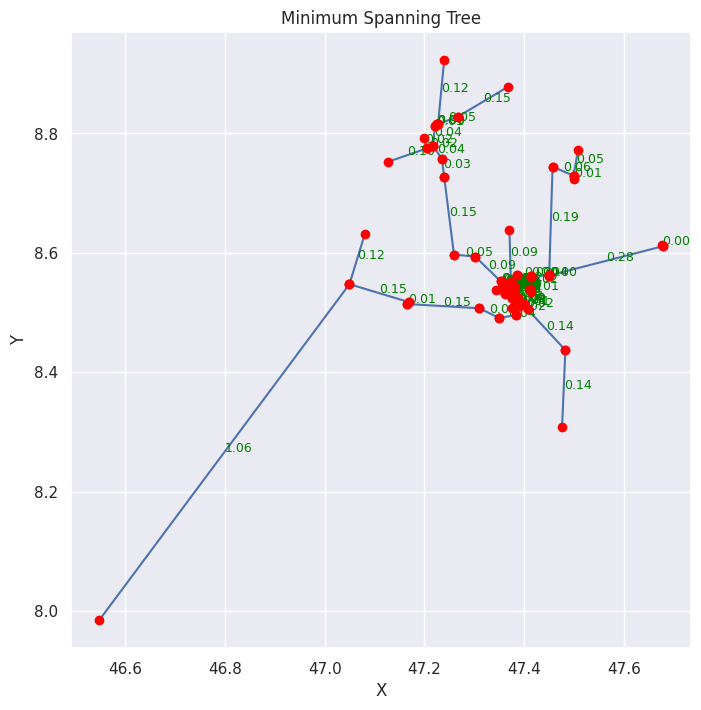

In [ ]:
# Function to plot the MST
def plot_mst(edges):
    plt.figure(figsize=(8, 8))
    plt.title("Minimum Spanning Tree")

    for edge in edges:
        point1, point2, dist = edge
        x_coords = [point1[0], point2[0]]
        y_coords = [point1[1], point2[1]]

        # Plot the edge
        plt.plot(x_coords, y_coords, 'b-', label=f"{dist:.2f}" if dist < 10 else None)

        # Mark the points
        plt.scatter(point1[0], point1[1], color='red', zorder=5)
        plt.scatter(point2[0], point2[1], color='red', zorder=5)

        # Annotate with distances
        mid_x = (point1[0] + point2[0]) / 2
        mid_y = (point1[1] + point2[1]) / 2
        plt.text(mid_x, mid_y, f"{dist:.2f}", color="green", fontsize=9)

    # Adjust plot
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# Call the function to plot the MST
plot_mst(mst_coords)

In [ ]:
# Find the midpoint of the coordintes
midpoint = (np.average(np.array(coords).T[0]), np.average(np.array(coords).T[1]))
midpoint

(47.35123276680492, 8.573852378200021)

In [ ]:
# Function to plot MST on a map
def plot_mst_map(edges, midpoint):
    # Initialize a folium map centered around the midpoint of the first edge
    mst_map = folium.Map(location=midpoint, zoom_start=12)

    for edge in edges:
        point1, point2, dist = edge

        # Add the edge to the map
        folium.PolyLine(
            [point1, point2],
            color="blue",
            weight=2.5,
            tooltip=f"Distance: {dist} km",
        ).add_to(mst_map)

        # Add markers for the points
        folium.Marker(point1, popup=f"Point: {point1}").add_to(mst_map)
        folium.Marker(point2, popup=f"Point: {point2}").add_to(mst_map)

    return mst_map

In [ ]:
# Generate the map
mst_map = plot_mst_map(mst_coords, midpoint)
mst_map

In [ ]:
# Find the largest distance between any two coordinates in the Minimum Spanning Tree
rows = np.zeros((len(coords), len(coords)))
for edge in resmst:
  x, y, dist = edge
  rows[x, y] = dist
  rows[y, x] = dist

max_dist = max([i[-1] for i in resmst])
max_dist

1.0645420253503968

In [ ]:
# Calculate the adjacency matrix of the minimum spanning tree that gives the distance between the corresponding coordinates
df_adjacency_mat = pd.DataFrame(rows)
df_adjacency_mat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.036734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.028522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002727,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.002142,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
105,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
106,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.055927,0.0,0.0,0.0,0.0,0.000000,0.0
107,0.0,0.0,0.0,0.0,0.002142,0.0,0.0,0.0,0.0,0.0,0.001955,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


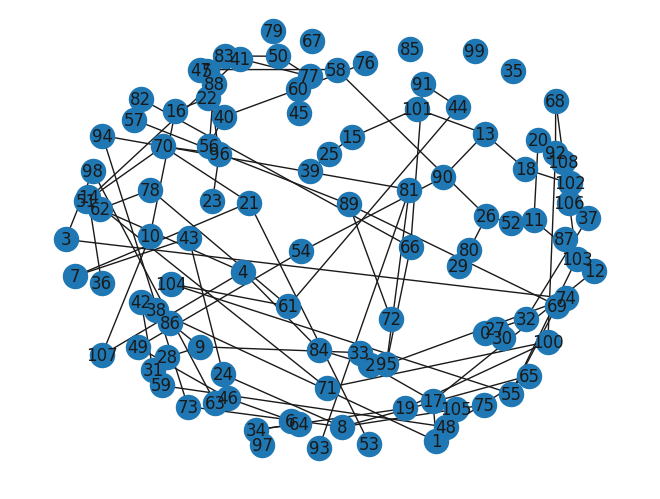

In [ ]:
# Create a graph from the adjacency matrix
G_am = nx.from_pandas_adjacency(df_adjacency_mat)
nx.draw(G_am, with_labels= True)

In [ ]:
# Calculate the degree centrality of each node in the graph
centrality = nx.degree_centrality(G_am)
centrality

{0: 0.009259259259259259,
 1: 0.018518518518518517,
 2: 0.018518518518518517,
 3: 0.018518518518518517,
 4: 0.027777777777777776,
 5: 0.009259259259259259,
 6: 0.009259259259259259,
 7: 0.018518518518518517,
 8: 0.037037037037037035,
 9: 0.027777777777777776,
 10: 0.018518518518518517,
 11: 0.018518518518518517,
 12: 0.018518518518518517,
 13: 0.027777777777777776,
 14: 0.018518518518518517,
 15: 0.018518518518518517,
 16: 0.018518518518518517,
 17: 0.027777777777777776,
 18: 0.018518518518518517,
 19: 0.018518518518518517,
 20: 0.009259259259259259,
 21: 0.027777777777777776,
 22: 0.009259259259259259,
 23: 0.009259259259259259,
 24: 0.018518518518518517,
 25: 0.018518518518518517,
 26: 0.027777777777777776,
 27: 0.027777777777777776,
 28: 0.009259259259259259,
 29: 0.009259259259259259,
 30: 0.009259259259259259,
 31: 0.009259259259259259,
 32: 0.018518518518518517,
 33: 0.009259259259259259,
 34: 0.018518518518518517,
 35: 0.0,
 36: 0.009259259259259259,
 37: 0.018518518518518517,
 

In [ ]:
# Calculate betweenness centrality for each node in the graph, which measures how often a node
# appears on the shortest paths between other nodes.
dist_resmst = {(i[0], i[1]): i[2] for i in resmst}
nx.set_edge_attributes(G_am, dist_resmst, 'distance')
betweenness_centr = nx.betweenness_centrality(G_am, weight= 'distance', normalized= False)
betweenness_centr
max_bc = max(betweenness_centr.values())
max_bc
betweenness_centr = list(betweenness_centr.values())
betweenness_centr = [i/max_bc for i in betweenness_centr]
betweenness_centr

[0.0,
 0.20548819400127633,
 0.33312061263560944,
 0.06190172303765156,
 0.4830887045309509,
 0.0,
 0.0,
 0.5577536694320357,
 0.694639438417358,
 0.0622208040842374,
 0.06190172303765156,
 0.031269942565411615,
 0.06190172303765156,
 0.3433312061263561,
 0.031269942565411615,
 0.06190172303765156,
 0.031269942565411615,
 0.31652839821314616,
 0.20548819400127633,
 0.5041480536056159,
 0.0,
 0.5472239948947033,
 0.0,
 0.0,
 0.5902999361837907,
 0.031269942565411615,
 0.09253350350989151,
 0.0622208040842374,
 0.0,
 0.0,
 0.0,
 0.0,
 0.09189534141671984,
 0.0,
 0.48500319081046583,
 0.0,
 0.0,
 0.12125079770261646,
 0.18059987236758138,
 0.0,
 0.26419910657306955,
 0.4020421186981493,
 0.031269942565411615,
 0.574345883854499,
 0.7683471601786854,
 0.0,
 0.42373962986598596,
 0.1499680918953414,
 0.031269942565411615,
 0.4020421186981493,
 0.3567326100829611,
 0.42373962986598596,
 0.0,
 0.0,
 0.37970644543714105,
 0.7198468410976387,
 0.2839821314613912,
 0.0,
 0.12125079770261646,
 0.

In [ ]:
# Add the centrality values to the dataframe
df_att['centrality'] = list(centrality.values())
df_att.head(5)

,@type,identifier,copyrightHolder,license,category,name,description,titleTeaser,zurichCard,osm_id,image,photo,dateModified,address,geoCoordinates,place,addressCountry,addressLocality,postalCode,streetAddress,telephone,email,url,latitude,longitude,centrality
0,LocalBusiness,1011454,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'N...",Jungfraujoch with the Zürich Card,<p>Smart travelers can save 15% on a day trip to the spectacular Jungfraujoch! All you require i...,Jungfraujoch with the Zürich Card,True,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_jungfraujoch_50412.j...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_tour_jungfraujoch_1...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Grindelwald', 'postalCode': '3818', 'streetAddress'...","{'latitude': 46.547539504451, 'longitude': 7.9851704701986}",[],CH,Grindelwald,3818,Eigergletscher-Jungfraujoch,+41 33 828 72 33,info@jungfrau.ch,https://www.jungfrau.ch/de-ch/jungfraujoch-top-of-europe/,46.547540,7.985170,0.009259
1,LocalBusiness,1011189,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}",Urban Art at Zurich Airport,"<h3>Onur Dinc<p>The artist, who grew up in Solothurn and lives in Berlin, creates photorealistic...",Urban Art at Zurich Airport,False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_z...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich-Flughafen', 'postalCode': '8058', 'streetAdd...","{'latitude': 47.450098, 'longitude': 8.561898}",[],CH,Zürich-Flughafen,8058,,None,None,https://www.flughafen-zuerich.ch/de/passagiere/erleben/erlebnisse/urbanart,47.450098,8.561898,0.018519
2,SportsActivityLocation,1010518,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'Sport': {'swissId': 'sui_01...",Orelliweg,"<p>The Rigiblick funicular takes you up to the <a href=""https://www.zuerich.com/en/node/1909"">th...",Orelliweg,False,54939277.0,{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_orelliweg_1280x960_3...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_orelliweg_1280x960_...,2024-11-20T16:27,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8044', 'streetAddress': 'Or...","{'latitude': 47.38525, 'longitude': 8.5623059}",['Outdoors'],CH,Zürich,8044,Orelliweg,None,None,None,47.385250,8.562306,0.018519
3,CivicStructure,1001309,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}",Bronze City Model on Stadthausquai,"<p>Thanks to this model, both visually impaired and sighted people can walk through downtown Zur...",Bronze City Model,False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_bronze_stadtmodell_1...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_bronze_stadtmodell_...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8001', 'streetAddress': 'St...","{'latitude': 47.369305, 'longitude': 8.54144}",['Outdoors'],CH,Zürich,8001,Stadthausquai 17,None,None,None,47.369305,8.541440,0.018519
4,TouristAttraction,1001235,Zurich Tourism www.zuerich.com,CC BY-SA,{'Attractions': {'swissId': ''}},Polybahn,"<p>The &ldquo;Polyb&auml;hnli&rdquo;, as the little red funicular is affectionately called, take...",Polybahn,True,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2024/web_zuerich_polybahn_1280x960_52...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2024/web_zuerich_polybahn_1280x960_5...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': '

In [ ]:
# Add the betweenness centrality values to the dataframe
df_att['betweenness_centrality'] = betweenness_centr
df_att.head(5)

,@type,identifier,copyrightHolder,license,category,name,description,titleTeaser,zurichCard,osm_id,image,photo,dateModified,address,geoCoordinates,place,addressCountry,addressLocality,postalCode,streetAddress,telephone,email,url,latitude,longitude,centrality,betweenness_centrality
0,LocalBusiness,1011454,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'N...",Jungfraujoch with the Zürich Card,<p>Smart travelers can save 15% on a day trip to the spectacular Jungfraujoch! All you require i...,Jungfraujoch with the Zürich Card,True,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_jungfraujoch_50412.j...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_tour_jungfraujoch_1...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Grindelwald', 'postalCode': '3818', 'streetAddress'...","{'latitude': 46.547539504451, 'longitude': 7.9851704701986}",[],CH,Grindelwald,3818,Eigergletscher-Jungfraujoch,+41 33 828 72 33,info@jungfrau.ch,https://www.jungfrau.ch/de-ch/jungfraujoch-top-of-europe/,46.547540,7.985170,0.009259,0.000000
1,LocalBusiness,1011189,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}",Urban Art at Zurich Airport,"<h3>Onur Dinc<p>The artist, who grew up in Solothurn and lives in Berlin, creates photorealistic...",Urban Art at Zurich Airport,False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_z...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich-Flughafen', 'postalCode': '8058', 'streetAdd...","{'latitude': 47.450098, 'longitude': 8.561898}",[],CH,Zürich-Flughafen,8058,,None,None,https://www.flughafen-zuerich.ch/de/passagiere/erleben/erlebnisse/urbanart,47.450098,8.561898,0.018519,0.205488
2,SportsActivityLocation,1010518,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'Sport': {'swissId': 'sui_01...",Orelliweg,"<p>The Rigiblick funicular takes you up to the <a href=""https://www.zuerich.com/en/node/1909"">th...",Orelliweg,False,54939277.0,{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_orelliweg_1280x960_3...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_orelliweg_1280x960_...,2024-11-20T16:27,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8044', 'streetAddress': 'Or...","{'latitude': 47.38525, 'longitude': 8.5623059}",['Outdoors'],CH,Zürich,8044,Orelliweg,None,None,None,47.385250,8.562306,0.018519,0.333121
3,CivicStructure,1001309,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}",Bronze City Model on Stadthausquai,"<p>Thanks to this model, both visually impaired and sighted people can walk through downtown Zur...",Bronze City Model,False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_bronze_stadtmodell_1...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_bronze_stadtmodell_...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8001', 'streetAddress': 'St...","{'latitude': 47.369305, 'longitude': 8.54144}",['Outdoors'],CH,Zürich,8001,Stadthausquai 17,None,None,None,47.369305,8.541440,0.018519,0.061902
4,TouristAttraction,1001235,Zurich Tourism www.zuerich.com,CC BY-SA,{'Attractions': {'swissId': ''}},Polybahn,"<p>The &ldquo;Polyb&auml;hnli&rdquo;, as the little red funicular is affectionately called, take...",Polybahn,True,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2024/web_zuerich_polybahn_1280x960_52...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2024/web_zuerich_polybahn_1280x960_5...,2024

## Final preprocess

In [ ]:
# Get the coordinates of the hotels in an array for suitable computations
hotel_coords = df_hotels[['Latitude', 'Longitude']].to_numpy()
hotel_coords = [ np.array(val) for val in hotel_coords]

In [ ]:
# Obtain the total distance from each hotel to a set of key attractions
hotel_distances = []

for hotel in hotel_coords:
    total_distance = 0  # Sum of distances for this hotel

    # Loop over each attraction and calculate the distance to the hotel
    for attraction in mst_coords:
        attraction_coords = attraction[0]  # Attraction coordinates (first part of the tuple)
        hotel_coords = np.array(hotel)  # Hotel coordinates (from the hotel_data list)

        # Calculate the distance between the hotel and this attraction using the `distance` method
        total_distance += mst.distance(hotel_coords, attraction_coords)

    # Append the total distance for this hotel
    hotel_distances.append(total_distance)

# Now `hotel_distances` contains the sum of distances for each hotel
for i, hotel_distance in enumerate(hotel_distances):
    print(f"Hotel {i+1} total distance: {hotel_distance}")

Hotel 1 total distance: 12.959401800981606
Hotel 2 total distance: 11.833264152225343
Hotel 3 total distance: 13.561509725350518
Hotel 4 total distance: 11.303830995619347
Hotel 5 total distance: 12.334080626820896
Hotel 6 total distance: 14.036149230522437
Hotel 7 total distance: 12.866279780112688
Hotel 8 total distance: 10.94682145679035
Hotel 9 total distance: 14.309800325350572
Hotel 10 total distance: 10.946637725350378
Hotel 11 total distance: 10.984198061964879
Hotel 12 total distance: 22.826596310932125
Hotel 13 total distance: 17.10777672535027
Hotel 14 total distance: 11.576264956267309
Hotel 15 total distance: 11.270929477078475
Hotel 16 total distance: 15.660137169833863
Hotel 17 total distance: 14.63941292535037
Hotel 18 total distance: 17.804024974301136
Hotel 19 total distance: 11.183837226169977
Hotel 20 total distance: 11.499804661521079
Hotel 21 total distance: 12.14691264832252
Hotel 22 total distance: 11.794075420991422
Hotel 23 total distance: 11.721017925350449
H

In [ ]:
# Create a new column in the hotels dataset with the previously calculated total distances
df_hotels['total_distance'] = hotel_distances
h_df = df_hotels.copy()
h_df.head(5)

,web-scraper-order,web-scraper-start-url,name,address,description,review_cat,price,no_reviews,Latitude,Longitude,total_distance
0,1732027449-1,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Zurich Youth Hostel,"Mutschellenstrasse 114A, Zurich, Switzerland","Offering 421 rooms, the 2-star Zurich Youth Hostel boasts a location within 5 minutes' walk of L...",4,61,4093,47.350288,8.527833,12.959402
1,1732027449-2,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Saint Georges Hotel,"Weberstrasse 11, Zurich, Switzerland","Located 15 km from Kloten airport, the 2-star Saint Georges Hotel Zurich features airport transf...",4,114,1894,47.370729,8.528126,11.833264
2,1732027449-3,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Ibis Zuerich City West,"Schiffbaustrasse 11, Zurich, Switzerland","A 10-minute drive from Old Town, the 3-star Ibis Zurich City West hotel offers a lift, a snack a...",3,143,2135,47.389056,8.517157,13.561510
3,1732027449-4,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Hotel Seehof,"Seehofstrasse 11, Zurich, Switzerland","Featuring a currency exchange and a lift, the 3-star Hotel Seehof Zurich is located about 5 minu...",3,213,949,47.364360,8.547783,11.303831
4,1732027449-5,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Inside Five,"Motorenstrasse 11, Zurich, Switzerland","Located about a 5-minute walk from Markthalle, the comfortable 3-star Inside Five Aparthotel Zur...",3,112,1977,47.384977,8.529051,12.334081


In [ ]:
# Create a copy of the preprocessed attractions dataset
a_df = df_att.copy()
a_df.head(5)

,@type,identifier,copyrightHolder,license,category,name,description,titleTeaser,zurichCard,osm_id,image,photo,dateModified,address,geoCoordinates,place,addressCountry,addressLocality,postalCode,streetAddress,telephone,email,url,latitude,longitude,centrality,betweenness_centrality
0,LocalBusiness,1011454,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'N...",Jungfraujoch with the Zürich Card,<p>Smart travelers can save 15% on a day trip to the spectacular Jungfraujoch! All you require i...,Jungfraujoch with the Zürich Card,True,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_jungfraujoch_50412.j...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_tour_jungfraujoch_1...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Grindelwald', 'postalCode': '3818', 'streetAddress'...","{'latitude': 46.547539504451, 'longitude': 7.9851704701986}",[],CH,Grindelwald,3818,Eigergletscher-Jungfraujoch,+41 33 828 72 33,info@jungfrau.ch,https://www.jungfrau.ch/de-ch/jungfraujoch-top-of-europe/,46.547540,7.985170,0.009259,0.000000
1,LocalBusiness,1011189,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Place': {'swissId': ''}, 'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}",Urban Art at Zurich Airport,"<h3>Onur Dinc<p>The artist, who grew up in Solothurn and lives in Berlin, creates photorealistic...",Urban Art at Zurich Airport,False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_z...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2023/web_zuerich_urbanart_flughafen_...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich-Flughafen', 'postalCode': '8058', 'streetAdd...","{'latitude': 47.450098, 'longitude': 8.561898}",[],CH,Zürich-Flughafen,8058,,None,None,https://www.flughafen-zuerich.ch/de/passagiere/erleben/erlebnisse/urbanart,47.450098,8.561898,0.018519,0.205488
2,SportsActivityLocation,1010518,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Attractions': {'swissId': ''}, 'Vantage Points': {'swissId': ''}, 'Sport': {'swissId': 'sui_01...",Orelliweg,"<p>The Rigiblick funicular takes you up to the <a href=""https://www.zuerich.com/en/node/1909"">th...",Orelliweg,False,54939277.0,{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_orelliweg_1280x960_3...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2022/web_zuerich_orelliweg_1280x960_...,2024-11-20T16:27,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8044', 'streetAddress': 'Or...","{'latitude': 47.38525, 'longitude': 8.5623059}",['Outdoors'],CH,Zürich,8044,Orelliweg,None,None,None,47.385250,8.562306,0.018519,0.333121
3,CivicStructure,1001309,Zurich Tourism www.zuerich.com,CC BY-SA,"{'Attractions': {'swissId': ''}, 'Works of Art': {'swissId': ''}}",Bronze City Model on Stadthausquai,"<p>Thanks to this model, both visually impaired and sighted people can walk through downtown Zur...",Bronze City Model,False,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_bronze_stadtmodell_1...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2021/web_zuerich_bronze_stadtmodell_...,2024-10-14T15:56,"{'addressCountry': 'CH', 'addressLocality': 'Zürich', 'postalCode': '8001', 'streetAddress': 'St...","{'latitude': 47.369305, 'longitude': 8.54144}",['Outdoors'],CH,Zürich,8001,Stadthausquai 17,None,None,None,47.369305,8.541440,0.018519,0.061902
4,TouristAttraction,1001235,Zurich Tourism www.zuerich.com,CC BY-SA,{'Attractions': {'swissId': ''}},Polybahn,"<p>The &ldquo;Polyb&auml;hnli&rdquo;, as the little red funicular is affectionately called, take...",Polybahn,True,NaN,{'url': 'https://www.zuerich.com/sites/default/files/image/2024/web_zuerich_polybahn_1280x960_52...,[{'url': 'https://www.zuerich.com/sites/default/files/image/2024/web_zuerich_polybahn_1280x960_5...,2024

In [ ]:
# Calculate the minimum value from the total distance column
min_distance = min(h_df['total_distance'].to_list())
min_distance

10.935627542653808

In [ ]:
# Calculate the maximum value from the total distance column
max_distance = max(h_df['total_distance'].to_list())
max_distance

49.413659925350345

{'whiskers': [<matplotlib.lines.Line2D at 0x7c2916b73d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7c2916c67ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c2916b724a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c2920a567d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c2920faa4a0>],
 'means': []}

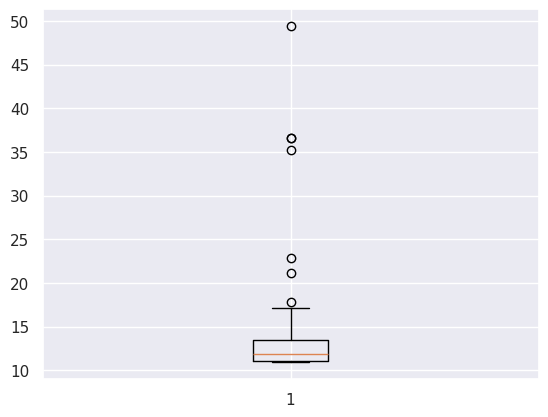

In [ ]:
# Boxplot of the total distances to identify outliers
plt.boxplot(h_df['total_distance'].tolist())

In [ ]:
# Drop all the observations with a total distance greater than 15
h_df = h_df.drop(h_df[h_df.total_distance > 15].index)
h_df.head()

,web-scraper-order,web-scraper-start-url,name,address,description,review_cat,price,no_reviews,Latitude,Longitude,total_distance
0,1732027449-1,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Zurich Youth Hostel,"Mutschellenstrasse 114A, Zurich, Switzerland","Offering 421 rooms, the 2-star Zurich Youth Hostel boasts a location within 5 minutes' walk of L...",4,61,4093,47.350288,8.527833,12.959402
1,1732027449-2,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Saint Georges Hotel,"Weberstrasse 11, Zurich, Switzerland","Located 15 km from Kloten airport, the 2-star Saint Georges Hotel Zurich features airport transf...",4,114,1894,47.370729,8.528126,11.833264
2,1732027449-3,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Ibis Zuerich City West,"Schiffbaustrasse 11, Zurich, Switzerland","A 10-minute drive from Old Town, the 3-star Ibis Zurich City West hotel offers a lift, a snack a...",3,143,2135,47.389056,8.517157,13.561510
3,1732027449-4,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Hotel Seehof,"Seehofstrasse 11, Zurich, Switzerland","Featuring a currency exchange and a lift, the 3-star Hotel Seehof Zurich is located about 5 minu...",3,213,949,47.364360,8.547783,11.303831
4,1732027449-5,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Inside Five,"Motorenstrasse 11, Zurich, Switzerland","Located about a 5-minute walk from Markthalle, the comfortable 3-star Inside Five Aparthotel Zur...",3,112,1977,47.384977,8.529051,12.334081


{'whiskers': [<matplotlib.lines.Line2D at 0x7c291640b0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c2916408d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c291640a890>],
 'medians': [<matplotlib.lines.Line2D at 0x7c2916408610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c2916408dc0>],
 'means': []}

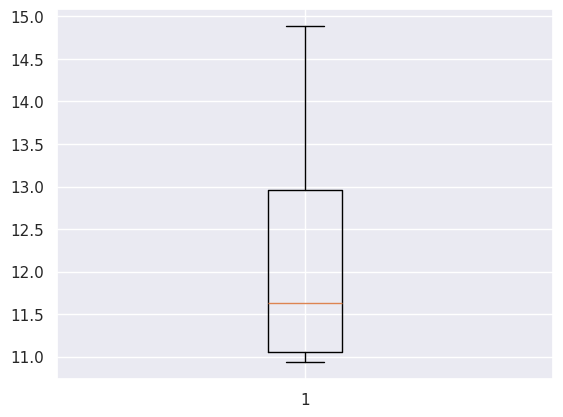

In [ ]:
# Boxplot of the total distances to check the last step
plt.boxplot(h_df['total_distance'].tolist())

In [ ]:
# Calculate the quantiles
h_df.total_distance.quantile([0.25, 0.5, 0.75])

,total_distance
0.25,11.048084
0.50,11.626074
0.75,12.959402


In [ ]:
# Get the minimum distance of all total distances
min_distance

10.935627542653808

In [ ]:
# Get the maximum distance of all total distances (after dropping some observations)
max_distance = max(h_df['total_distance'].to_list())
max_distance

14.888013051910796

In [ ]:
# Funtion to compute a score based on the distance
def distance_score(dist): # works for distances between 11 -> 15
  return math.ceil(5 - dist%5)

h_df['distance_score'] = h_df.total_distance.apply(distance_score)
h_df.head()

,web-scraper-order,web-scraper-start-url,name,address,description,review_cat,price,no_reviews,Latitude,Longitude,total_distance,distance_score
0,1732027449-1,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Zurich Youth Hostel,"Mutschellenstrasse 114A, Zurich, Switzerland","Offering 421 rooms, the 2-star Zurich Youth Hostel boasts a location within 5 minutes' walk of L...",4,61,4093,47.350288,8.527833,12.959402,3
1,1732027449-2,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Saint Georges Hotel,"Weberstrasse 11, Zurich, Switzerland","Located 15 km from Kloten airport, the 2-star Saint Georges Hotel Zurich features airport transf...",4,114,1894,47.370729,8.528126,11.833264,4
2,1732027449-3,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Ibis Zuerich City West,"Schiffbaustrasse 11, Zurich, Switzerland","A 10-minute drive from Old Town, the 3-star Ibis Zurich City West hotel offers a lift, a snack a...",3,143,2135,47.389056,8.517157,13.561510,2
3,1732027449-4,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Hotel Seehof,"Seehofstrasse 11, Zurich, Switzerland","Featuring a currency exchange and a lift, the 3-star Hotel Seehof Zurich is located about 5 minu...",3,213,949,47.364360,8.547783,11.303831,4
4,1732027449-5,https://www.hotels-zurich.com/search/?sort=Rating&order=DESC&part=1&Name=11,Inside Five,"Motorenstrasse 11, Zurich, Switzerland","Located about a 5-minute walk from Markthalle, the comfortable 3-star Inside Five Aparthotel Zur...",3,112,1977,47.384977,8.529051,12.334081,3


{'whiskers': [<matplotlib.lines.Line2D at 0x7c2916bb5900>,
 'caps': [<matplotlib.lines.Line2D at 0x7c2916bb7d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c2916bb6ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c2916bb5ea0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c29163db100>],
 'means': []}

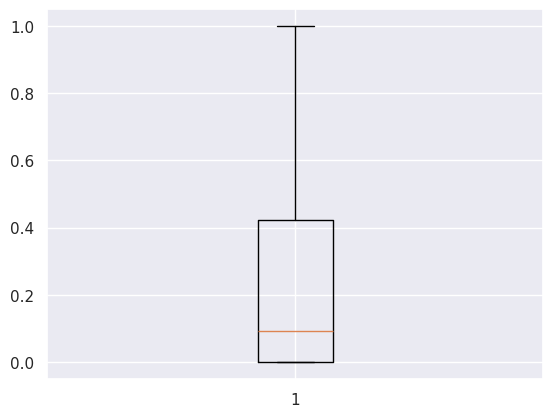

In [ ]:
# Boxplot of the betweenness centrality scores
plt.boxplot(a_df['betweenness_centrality'].tolist())

In [ ]:
# Count the occurrences of each unique value of the betweenness centrality column
a_df['betweenness_centrality'].value_counts()

,count
betweenness_centrality,
0.000000,33
0.031270,8
0.061902,6
0.091895,6
0.062221,5
0.356733,3
0.504148,2
0.121251,2
0.485003,2


In [ ]:
# Scale the values in the betweenness centrality column by multiplying them by 10 and rounding them down to the nearest integer.
a_df['betweenness_centrality'] = (a_df['betweenness_centrality']*10 )//1

In [ ]:
# Count the occurrences of each unique value of the betweenness centrality column after scalin them
a_df['betweenness_centrality'].value_counts()

,count
betweenness_centrality,
0.0,59
3.0,10
5.0,9
4.0,8
6.0,6
1.0,6
7.0,6
2.0,4
10.0,1
